<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Cross Validation

Estimated time needed: **45** minutes

When performing supervised machine learning analysis, it is common to withhold a portion of the data to test the final model's performance. This model testing is performed on the 'unseen' data, which the model was not trained on. This withholding of a portion of the dataset for testing is called Cross-Validation. Cross-Validation can also be used to select hyper-parameters and test the final model. In this section, we will will focus on the test data only.

Cross-Validation also helps avoid over-fitting; a complex model could repeat the labels of the samples that it has just seen and, therefore, would have a perfect score but would fail to predict anything useful on the 'unseen' data. Furthermore, a complex model could just be modeling noise.


Cross validation method involves dividing the dataset into 3 parts:

*   training set - is portion of the data used to fit the model
*   validation set - is portion of the data to optimize the hyper-parameters of the model, this will be illustrated in the next lab
*   test set - is the portion of the data used for evaluation of a final model fit on the training dataset


`Scikit Learn` library contains many methods that can perform the splitting of the data into training, testing and validation sets. The most popular methods that we will cover in this Jupyter Notebook are:

*   train_test_split - creates a single split into train and test sets
*   K-fold - creates number of k-fold splits, allowing cross validation
*   cross_val_score - evaluates model's score through cross validation


## Objectives

After completing this lab you will be able to:

*   Understand how to split the data into a training and testing sets
*   Understand and perform K-fold cross validation method
*   Calculate Cross Validation Scores


***


## **Setup**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for machine learning and machine-learning-pipeline related functions.


## **Import the required libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"


In [2]:
#!pip install -U scikit-learn

In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer


## **Reading our data**


For this lab, we will be using the car sales dataset, hosted on IBM Cloud object storage. This dataset can also be found and downloaded from [kaggle.com](https://www.kaggle.com/datasets/goyalshalini93/car-data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01), an open public data source.
The dataset contains all the information about cars, a name of a manufacturer, all car's technical parameters and a sale price of a car.

This dataset has already been pre-cleaned and encoded (using one-hot and label encoders) in the Linear Regression Notebook.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [5]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv')
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


We apply `dtypes.value_counts()` to see what types of data we have.


In [6]:
data.dtypes.value_counts()

float64    36
dtype: int64

We can verify the data type using the method `info()`.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

As we see from above, we now have only numeric parameters.


### Data Preparation

Let's first split our data into `X` features and `y` target.


In [8]:
X = data.drop(columns=['price'])
y = data['price'].copy()

# Train Test Split


Now, we split our data into training and testing sets. Training data is used for our model to recognize patterns using some criteria, the test data is used for model evaluation, as shown in the image below.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/images/trin-test.png"  />
</center>
source scikit-learn.org


We use the function `train_test_split` that  splits arrays or matrices into random train and test subsets. The parameters of the `train_test_split` are:


`X,y`: the allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas data frames.

`test_size`:  If float, it should be between 0.0 and 1.0 and represents the proportion of the dataset to include in the test split. If int (integer), it represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

In our example, we will use 30% of the data for testing and 70% for training.

`random_state:` Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. in our case, we set it to "42".


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


### Model Building and Evaluation

Let's perform linear regression using traditional `train_test_split`, which will split the data into train and test set, so that each target value appears in both training and testing sets. We will start by creating a `LinearRegression()` object, lr.


In [10]:
lr = LinearRegression()

We apply the `LinearRegression()` model, m, and `fit()` our `X_train` and `  y_train `  training data.


In [11]:
lr.fit(X_train, y_train)

LinearRegression()

To make our predictions, we need to use our test data set. We apply `predict()` function on the testing data set.


In [12]:
predicted =lr.predict(X_test)

Now, let's check some evaluation statistics, such as the coefficient of determination, $R^{2}$, using the built-in method `score` or  `r2_score`, and the Root Mean Square Error, RMSE, for which we can use the `mean_squared_error` method, MSE.

The $R^{2}$ statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

For more information on [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) and [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01), please visit their corresponding documentations.


In [13]:
lr.score(X_train,y_train)

0.9262586554427378

Using the training data only, the $R^{2}$ is \~ 0.93. So, almost 93% of variability in the training data is explained by our model.


Using the test data  $R^{2}$, we get \~0.85, not as good as the previous score.


In [14]:
lr.score(X_test,y_test)

0.8485632504678495

We can also use  `r2_score()` method to calculate the $R^2$. It will provide the same result.


In [15]:
print(r2_score(y_true=y_test, y_pred=predicted))

0.8485632504678495


Now, let's calculate the RMSE. The smaller the RMSE number the better our model is.
We apply `mean_squared_error` to our `y_test`and our predicted data. Then, we take a square root of our MSE, using `np.sqrt()` function.


In [16]:
mse = mean_squared_error(y_true=y_test, y_pred=predicted)
rmse = np.sqrt(mse)
rmse

3239.1667277629745

### Prediction Example

Let's select some random data, using `iloc` and see some predicted versus actual values for the car prices.


In [17]:
some_data = X.iloc[:3]
some_labels = y.iloc[:3]

In [18]:
print("Predictions:", lr.predict(some_data))

Predictions: [13127.3125 13127.3125 15114.5   ]


In [19]:
print("Labels:", list(some_labels))

Labels: [13495.0, 16500.0, 16500.0]


In [20]:
predicted =lr.predict(X_test)
predicted

array([27698.    , 21388.75  , 10757.5   , 12109.8125, 26146.25  ,
        5404.4375,  8109.125 ,  7551.5625, 10137.3125,  9473.5   ,
       17351.    ,  7275.3125, 16508.375 , 10776.    , 39706.    ,
        5538.75  ,  2487.6875, 15678.    , 10789.9375, 11475.625 ,
       10822.9375, 15774.125 , 10418.75  ,  3607.125 ,  7027.3125,
       28687.125 , 18295.9375, 15201.    ,  4436.5625, 16402.8125,
       26792.4375,  5819.125 ,  4857.125 , 16617.9375,  8369.4375,
       30330.625 , 12320.8125, 13039.    ,  6297.4375, 16117.4375,
        8155.375 , 15155.8125, 14770.    ,  5251.875 ,  6244.5   ,
        9109.875 ,  5819.125 ,  7276.3125, 16705.1875, 15534.25  ,
        5025.3125, 21879.8125,  7092.1875, 11404.9375,  4372.6875,
       16529.9375, 18315.625 , 13039.    , 29731.9375,  5417.8125,
        9790.25  , 17036.875 ])

We can also use the pipeline to run operations on our data. For example we can standardize our data then perform linear regression by applying the method <code>fit</code>.


In [21]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
pipe

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

Let's calculate the R squared.


In [22]:
pipe.score(X_train,y_train)

0.9262722224294516

Using the training data only, the R squared is \~ 0.93.
Now, let's check the R squared on the test set.


In [23]:
pipe.score(X_test,y_test)

0.8419174509630338

The R squared is much lower. This value provides more accurate evaluation of our model since we test our model on the 'unseen' data set. In case if the R squared is negative, it is because the model is too complex and the data is overfitting. For more information, please, visit this [documentation](https://en.wikipedia.org/wiki/Overfitting?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) on overfitting.

This will make more sense when we explore polynomial regression.


## Exercise 1

Create a pipeline object called pipe1, replace standardization with normalization. Calculate the $R^{2}$ using the built-in method `score` and for RMSE, using `mean_squared_error` method.


In [24]:
# Enter your code and run the cell


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

pipe\_1 = Pipeline(\[('nn',Normalizer() ),('lr', LinearRegression())])
pipe\_1.fit(X_train, y_train)

pipe\_1.score(X_train,y_train)
pipe\_1.score(X_test,y_test)

pred =pipe\_1.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=pred)
rmse = np.sqrt(mse)
rmse

```
</details>
```


Note, you can also use `normalize` by setting the `LinearRegression(normalize=True)`.


## One feature


We can use the test data to select a feature with the best performance. We have a list of features:


In [25]:
features=list(X)
features

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

We can train a linear regression model using each feature and use the test data to obtain the best feature.


In [26]:
R_2=[]
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])

for feature in features:
    pipe.fit(X_train[[feature]],y_train)
    R_2.append(pipe.score(X_train[[feature]],y_train))
    
    

We can plot the $R^{2}$ for each feature.


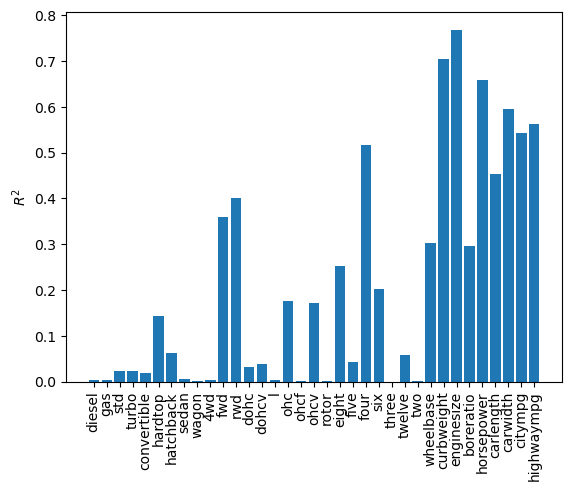

In [27]:
plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()

Now, we select the feature that works best, using `argmax()` function.


In [28]:
best=features[np.argmax(R_2)]
best

'enginesize'

So, 'enginesize' is the feature that produces the highest $R^{2}$. We then train the feature that works best using all the data.


In [29]:
pipe.fit(X[[best]],y)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

## Exercise 2

In this Exercise, find the best feature using the test data, without standardization.


In [30]:
# Enter your code and run the cell


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
R_2=[]

for feature in features:

```
lr.fit(X_train[[feature]], y_train)
R_2.append(lr.score(X_test[[feature]],y_test))
```

best=features\[np.argmax(R\_2)]

plt.bar(features,R\_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")

plt.show()
best=features\[np.argmax(R\_2)]
print(best)

```
</details>
```


# K Fold Cross Validation


Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation, as shown in the Diagram below. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training. K-fold is also used for hyper-parameters selection that we will discuss later.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/images/k-fold.png"  />
</center>
<center>source scikit-learn.org</center>


## Cross Validation Score


Now, let's use *Scikit-Learn's* *K-fold cross-validation* method to see whether we can assess the performance of our model. The *K-fold cross-validation* method splits the training set into the number of folds (n_splits), as now in the Diagram above, if we have K folds, K-1 is used for training and one fold is used for testing. The input parameters are as follows:


<b>estimatorestimator</b>: The object to use to `fit` the data.

<b>X</b>: array-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.

<b>y</b>: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.

<b>scoring</b>: A str or a scorer callable object/ function with signature scorer (estimator, X, y) which should return only a single value.  See model evaluation [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01#scoring-parameter) for more information.


In [31]:
N=len(X)
N

205

Now, let's create a Linear Regression object.


In [32]:
lr = LinearRegression()

Then, calculate cross validation scores based on our testing sets.


In [33]:
scores = cross_val_score(lr, X, y, scoring ="r2", cv=3)

Now, we have the $R^{2}$ for each fold not used to train the model.


In [34]:
scores 

array([ 0.81736538,  0.72629254, -0.09433236])

We can calculate mean and standard deviation using the following function of the `scores`:


In [35]:
def display_scores(scores, print_=False):
    
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [36]:
display_scores(scores)

Scores: [ 0.81736538  0.72629254 -0.09433236]
Mean: 0.4831085210132337
Standard deviation: 0.4100016605699776


The larger the fold, the better the model performance is, as we are using more samples for training; the variance also decreases.


Cross Validation Scores are RMSE values for training the data on each of our folds, in our case cv = 3, so we get 3 scores, 1 for each fold.


## Exercise 3

In this Exercise, compute the cross validation scores for 5 folds, using the linear regression object `lr` and `neg_mean_squared_error` method for scoring.


In [37]:
# Enter your code and run the cell


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

scores = cross_val_score(lr, X ,y, scoring ="neg_mean_squared_error", cv=5)
lr_scores = np.sqrt(-scores)
display_scores(lr_scores)

```
</details>
```


### K Fold


In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a `KFold` object that  Provides train/test indices to split data into train/test sets in an iterative manner.

`n_splitsint`:  A number of folds. Must be at least 2. Changed in version 0.22: n_splits default value changed from 3 to 5.

`shuffle`: Indicates whether to shuffle the data before splitting into batches. Note, the samples within each split will not be shuffled.

`random_state`: the random state.


We create the  `KFold` object `kf`, setting the number of splits to 2.


In [38]:
n_splits=2
kf = KFold(n_splits = n_splits)

We train the model using the `split(X,y)` method. It provides the train/test indices for `X` and `y`. Half the data is used for training in the first iteration, and the rest is used for testing and displaying the indexes for each set.  For the second iteration, the data used for training is used for testing, and the testing data is used for training. We store the $R^2$ for each iteration in the array  `R_2`. The `np.zeros()` function returns a new array of given shape and type, filled with zeros. Then, we calculate the $R^2$ for each of the X_train and X_test splits.


In [39]:
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2 = np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
X_train, X_test =X.iloc[train_index],X.iloc[test_index]
    
y_train, y_test=y[train_index],y[test_index]
pipe.fit(X_train,y_train)
n=+1
R_2[k]=pipe.score(X_test, y_test)

TRAIN: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204]
TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35


We can calculate the average $R^2$.


In [40]:
R_2.mean()

0.23790953143245092

If we set the number of splits to three, we see 2/3's of the data is used for training.


In [41]:
n_splits=3
kf = KFold(n_splits = n_splits)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2=np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    
X_train, X_test =X.iloc[train_index],X.iloc[test_index]
    
y_train, y_test=y[train_index],y[test_index]
pipe.fit(X_train,y_train)
n=+1
R_2[k]=pipe.score(X_test, y_test)
    
    
R_2.mean()

TRAIN: [ 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204]
TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  

-0.028999640423315858

## Exercise 4

It many applications, it is useful to randomly select samples for K fold cross validation. In this Exercise, randomly select samples by setting `shuffle` to `True` in the `KFold` constructor. Use all the parameters, as above.


In [42]:
# Enter your code and run the cell


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

n_splits=3
kf = KFold(n_splits = n_splits,shuffle=True)
y = data\['price'].copy()
X = data.drop(columns=\['price'])
R\_2=np.zeros((n_splits,1))
pipe = Pipeline(\[('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
print("TRAIN:", train_index)
print("TEST:", test_index)

X_train, X_test =X.iloc\[train_index],X.iloc\[test_index]

y_train, y_test=y\[train_index],y\[test_index]
pipe.fit(X_train,y_train)
n=+1
R\_2\[k]=pipe.score(X_test, y_test)

R\_2.mean()

```
</details>
```


In the Regularization lab, we will learn how to use cross validation to select hyper-parameters.


# Congratulations! - You have completed the lab


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description             |
| ----------------- | ------- | ----------- | ------------------------------ |
| 2022-03-25        | 0.1     | Joseph S.   | Updated all content            |
| 2022-04-26        | 0.1     | Svitlana K. | Corrected minor grammar errors |
